In [1]:
import pandas as pd

# ODE

In [49]:
annotated_imgs_glaucoma = pd.read_csv("../Glaucoma-Ranking/datasets/annotated_imgs_glaucoma.csv")
ohts_merged_20200918 = pd.read_csv('../Glaucoma-Ranking/datasets/ohts_merged_20200918.csv', low_memory=False)
data_sortby_md = ohts_merged_20200918.loc[:,['filename', 'mdindex','enpoagdisc','visit']].sort_values(by=['filename']).reset_index(drop=True)

In [50]:
data_sortby_md

,filename,mdindex,enpoagdisc,visit
0,90001-AP461-L.tif,0.15,NaN,F72
1,90001-AP461-R.tif,0.15,NaN,F72
2,90001-BA657-L.tif,0.99,NaN,F12
3,90001-BA657-R.tif,0.99,NaN,F12
4,90001-DX584-L.tif,-0.43,NaN,F60
...,...,...,...,...
66709,91636-XG055-R.tif,NaN,NaN,FUV
66710,91636-YV110-L.tif,-1.61,NaN,F0
66711,91636-YV110-R.tif,-1.61,NaN,F0
66712,91636-ZG104-L.tif,0.11,NaN,F24


In [40]:
annotated_imgs_glaucoma['filename'] = annotated_imgs_glaucoma.img_id + ".tif"

In [37]:
glaucoma_data = annotated_imgs_glaucoma.merge(data_sortby_md, on="filename").drop(['img_id'], axis=1)
glaucoma_data.sort_values(by=['glaucoma'])

,glaucoma,filename,mdindex,enpoagdisc
251,False,90326-LV244-R.tif,-0.070000,NO
297,False,90631-DG883-L.tif,2.689999,NaN
296,False,90823-TJ297-L.tif,-4.509998,NaN
293,False,91555-FG814-R.tif,-3.359999,NaN
289,False,91112-XG820-L.tif,-9.289993,NaN
...,...,...,...,...
294,True,91165-BZ740-R.tif,0.460000,YES
108,True,90884-OV815-L.tif,-1.940000,YES
292,True,91112-AJ586-R.tif,0.730000,YES
290,True,90707-VM262-R.tif,1.639999,YES


In [69]:
data_sortby_md['subids'] = [i.split('-')[0] for i in data_sortby_md.filename]
# data_sortby_md['visit'] = [int(i[1:]) for i in data_sortby_md.visit]
idvsmd = data_sortby_md.loc[:,['subids','mdindex', 'visit','enpoagdisc']]

In [70]:
idvsmd

,subids,mdindex,visit,enpoagdisc
0,90001,0.15,F72,NaN
1,90001,0.15,F72,NaN
2,90001,0.99,F12,NaN
3,90001,0.99,F12,NaN
4,90001,-0.43,F60,NaN
...,...,...,...,...
66709,91636,NaN,FUV,NaN
66710,91636,-1.61,F0,NaN
66711,91636,-1.61,F0,NaN
66712,91636,0.11,F24,NaN


/tmp/ipykernel_19547/3053950442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idvsmd90007['visit'] = [int(i[1:]) for i in idvsmd90007.visit]
/tmp/ipykernel_19547/3053950442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idvsmd90007['enpoagdisc'] = (idvsmd90007.enpoagdisc == 'YES').to_numpy()*1
/tmp/ipykernel_19547/3053950442.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric

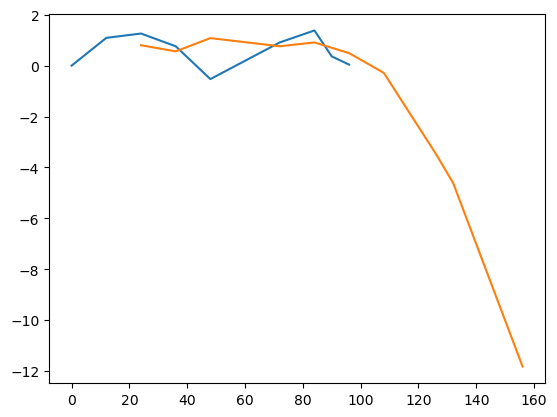

In [107]:
# idvsmd[idvsmd.subids == '90007']['visit'] = [int(i[1:]) for i in idvsmd[idvsmd.subids == '90007'].visit]
import matplotlib.pyplot as plt
idvsmd90007 = idvsmd[idvsmd.subids == '90030']
idvsmd90007['visit'] = [int(i[1:]) for i in idvsmd90007.visit]
idvsmd90007['enpoagdisc'] = (idvsmd90007.enpoagdisc == 'YES').to_numpy()*1
# idvsmd90007 = idvsmd90007.groupby('visit').mean().reset_index()
# plt.plot(idvsmd90007.visit, idvsmd90007.mdindex)
a = idvsmd90007[idvsmd90007.enpoagdisc == 0].groupby('visit').mean().reset_index()
b = idvsmd90007[idvsmd90007.enpoagdisc == 1].groupby('visit').mean().reset_index()
plt.plot(a.visit, a.mdindex)
plt.plot(b.visit, b.mdindex)

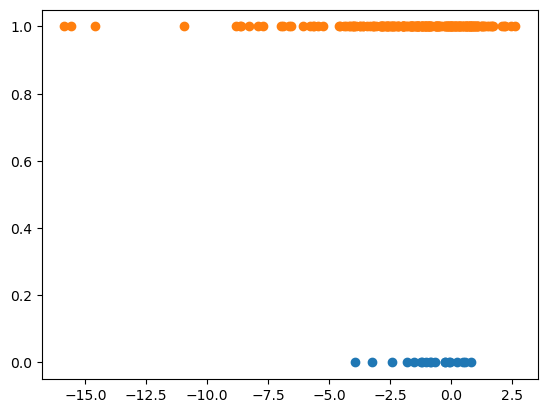

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# plt.scatter(glaucoma_data[glaucoma_data.glaucoma == False].mdindex, np.zeros(len(glaucoma_data[glaucoma_data.glaucoma == False].mdindex)))
# plt.scatter(glaucoma_data[glaucoma_data.glaucoma == True].mdindex, np.ones(len(glaucoma_data[glaucoma_data.glaucoma == True].mdindex)))
plt.scatter(glaucoma_data[glaucoma_data.enpoagdisc == 'NO'].mdindex, np.zeros(len(glaucoma_data[glaucoma_data.enpoagdisc == 'NO'].mdindex)))
plt.scatter(glaucoma_data[glaucoma_data.enpoagdisc == 'YES'].mdindex, np.ones(len(glaucoma_data[glaucoma_data.enpoagdisc == 'YES'].mdindex)))

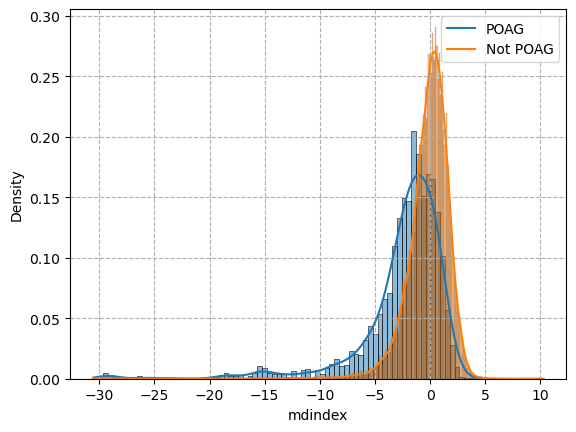

In [36]:
import seaborn as sns
sns.histplot(data_sortby_md[data_sortby_md.enpoagdisc == 'YES'].mdindex, kde=True, stat='density')
sns.histplot(data_sortby_md[data_sortby_md.enpoagdisc != 'YES'].mdindex, kde=True, stat='density')
# plt.hist(glaucoma_data[glaucoma_data.enpoagdisc == 'YES'].mdindex, bins=100, density=True)
# plt.hist(glaucoma_data[glaucoma_data.enpoagdisc == 'NO'].mdindex, bins=10,  density=True)
plt.grid(linestyle='--')
plt.legend(['POAG', 'Not POAG'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f58a9c41720>,
 'caps': [<matplotlib.lines.Line2D at 0x7f58a9c41c60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f58a9c41480>],
 'medians': [<matplotlib.lines.Line2D at 0x7f58a9c421a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f58a9c42440>],
 'means': []}

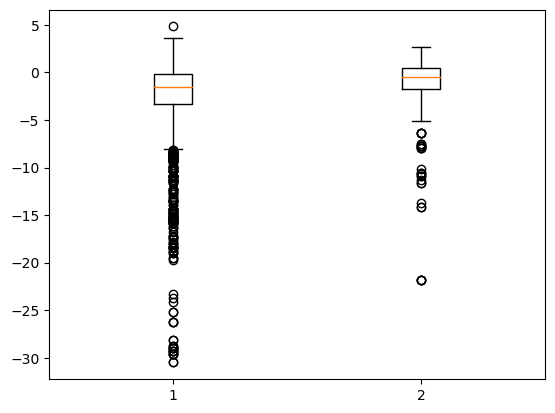

In [9]:
X_axis = np.arange(1) 
plt.boxplot(data_sortby_md[data_sortby_md.enpoagdisc == 'YES'].mdindex, positions=X_axis+1)
plt.boxplot(data_sortby_md[data_sortby_md.enpoagdisc != 'YES'].mdindex, positions=X_axis+2)

# Dataspliting

In [34]:
import glob
import os
phase='test'
if(phase == 'train'):
    glau_patients = glob.glob(f'/mnt/c/Users/PCM/Dropbox/longtitude/*')[:300]
elif(phase == 'val'):
    glau_patients = glob.glob(f'/mnt/c/Users/PCM/Dropbox/longtitude/*')[300:350]
elif(phase == 'test'):
    glau_patients = glob.glob(f'/mnt/c/Users/PCM/Dropbox/longtitude/*')[350:]
else:
    assert False, 'No phase founded'

for path in glau_patients:
    meta_data   = pd.read_csv(f'{path}/meta_data.csv')
    listglau    = meta_data[meta_data.enpoagdisc == "YES"].filename.str.replace('(tif)', 'jpg', regex=True).to_numpy()
    listnorm    = meta_data[meta_data.enpoagdisc != "YES"].filename.str.replace('(tif)', 'jpg', regex=True).to_numpy()
    for name in listnorm:
        os.system(f"cp {path}/{name} /mnt/c/Users/PCM/Dropbox/OHTS/{phase}/glaucoma/{name}")
    for name in listglau:
        os.system(f"cp {path}/{name} /mnt/c/Users/PCM/Dropbox/OHTS/{phase}/normal/{name}")
listglau

array(['91607-BW874-L.jpg', '91607-BW874-R.jpg', '91607-WF775-L.jpg',
       '91607-WF775-R.jpg', '91607-OA296-L.jpg', '91607-OA296-R.jpg',
       '91607-VR520-L.jpg', '91607-VR520-R.jpg'], dtype=object)

In [28]:
path

'/mnt/c/Users/PCM/Dropbox/longtitude/90007-L'

# Testing

In [48]:
data_sortby_md['filename'] = data_sortby_md.filename.str.replace('(tif)', 'jpg', regex=True)

In [66]:
import glob
phase = 'train'
numberofclasses = glob.glob(f'/mnt/c/Users/PCM/Dropbox/OHTS/{phase}/*')
lenofclass = {}
imagesinclass = {}
mdlist = {}
# namesinclass = {}
for i in range(len(numberofclasses)):
    imagesinclass[i] = glob.glob(numberofclasses[i] + '/*')
    lenofclass[i] = len(glob.glob(numberofclasses[i] + '/*'))
    # For preference comparison
    namesinclass = [i.split('/')[-1] for i in imagesinclass[i]]
    mdlist[i] = data_sortby_md[data_sortby_md['filename'].isin(namesinclass)].mdindex.to_numpy()

In [67]:
mdlist

{0: array([-2.43999863, -2.43999863, -1.78999996, ..., -0.41999984,
        -9.28999329, -9.28999329]),
 1: array([-3.80999947, -3.80999947, -2.6099987 , ..., -2.01999855,
        -2.3599987 , -2.3599987 ])}

In [42]:
namesinclass = {}
namesinclass[0] = [i.split('/')[-1] for i in imagesinclass[0]]
namesinclass[1] = [i.split('/')[-1] for i in imagesinclass[1]]
print(len(namesinclass[0]))
namesinclass[0]

5385


['90007-CI071-L.jpg',
 '90007-CI071-R.jpg',
 '90007-EQ577-L.jpg',
 '90007-EQ577-R.jpg',
 '90007-EZ215-L.jpg',
 '90007-EZ215-R.jpg',
 '90007-HH175-L.jpg',
 '90007-HH175-R.jpg',
 '90007-HL513-L.jpg',
 '90007-HL513-R.jpg',
 '90007-HW709-L.jpg',
 '90007-HW709-R.jpg',
 '90007-MF262-L.jpg',
 '90007-MF262-R.jpg',
 '90007-MM599-L.jpg',
 '90007-MM599-R.jpg',
 '90007-NC536-L.jpg',
 '90007-NC536-R.jpg',
 '90007-OC555-L.jpg',
 '90007-OC555-R.jpg',
 '90007-PZ973-L.jpg',
 '90007-PZ973-R.jpg',
 '90007-SI488-L.jpg',
 '90007-SI488-R.jpg',
 '90007-UP544-L.jpg',
 '90007-UP544-R.jpg',
 '90007-XD659-L.jpg',
 '90007-XD659-R.jpg',
 '90027-AV808-L.jpg',
 '90027-AV808-R.jpg',
 '90027-EH241-L.jpg',
 '90027-EH241-R.jpg',
 '90027-FO283-L.jpg',
 '90027-FO283-R.jpg',
 '90027-FS573-L.jpg',
 '90027-FS573-R.jpg',
 '90027-GF941-L.jpg',
 '90027-GF941-R.jpg',
 '90027-KD943-L.jpg',
 '90027-KD943-R.jpg',
 '90027-NZ042-L.jpg',
 '90027-NZ042-R.jpg',
 '90027-PZ676-L.jpg',
 '90027-PZ676-R.jpg',
 '90027-QS340-L.jpg',
 '90027-QS

In [59]:
mdlist = {}
mdlist[0] = data_sortby_md[data_sortby_md['filename'].isin(namesinclass[0])].mdindex.to_numpy()
mdlist[1] = data_sortby_md[data_sortby_md['filename'].isin(namesinclass[1])].mdindex.to_numpy()

In [60]:
mdlist[0]

array([-2.43999863, -2.43999863, -1.78999996, ..., -0.41999984,
       -9.28999329, -9.28999329])